In [1]:
# Import all required packages

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from nxviz import CircosPlot
%matplotlib inline
sns.set()

In [2]:
from tqdm import tqdm_notebook as tqdm
import pickle

In [3]:
df = pd.read_csv(r'Dataset_export/dataset_4.csv')

In [4]:
# sample data to learn netowkrx
#df =  df.sample(frac=0.1, random_state=1)

In [5]:
G = nx.from_pandas_edgelist(df, source='Origin', target='Dest', edge_attr=['DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Tail_Number', 'CRSDepTime', 'DepTime', 'DepDel15', 'DepTimeBlk', 'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDel15', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], create_using=nx.MultiDiGraph())

In [6]:
print("Number of airports: " + str(len(G.nodes())))

Number of airports: 355


In [15]:
nx.write_gpickle(G, 'G.gpickle')

In [7]:
# rank nodes
# top 10 airports with most edges i.e. KPI for busiest
# but this should be total edges per day with full data

sorted(G.nodes(), key=lambda x:len(list(G.nodes(x))), reverse=True)[0:10]

['JFK', 'LAX', 'DFW', 'HNL', 'OKC', 'OGG', 'SFO', 'MIA', 'ORD', 'LAS']

In [13]:
# rank nodes
# degree centrality - number of nodes connected to 'XYZ' over total number of nodes

deg_cent = nx.degree_centrality(G)
deg_cent_sorted = sorted(deg_cent.items(), key=lambda x:x[1], reverse=True)
deg_cent_sorted[0:10]

[('ATL', 3303.6158192090397),
 ('ORD', 2527.7994350282484),
 ('DEN', 2011.8559322033898),
 ('LAX', 1920.734463276836),
 ('DFW', 1911.3107344632767),
 ('SFO', 1535.6694915254238),
 ('PHX', 1444.138418079096),
 ('LAS', 1376.7542372881355),
 ('CLT', 1371.2909604519773),
 ('MSP', 1269.4717514124293)]

In [8]:
# ecdf

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

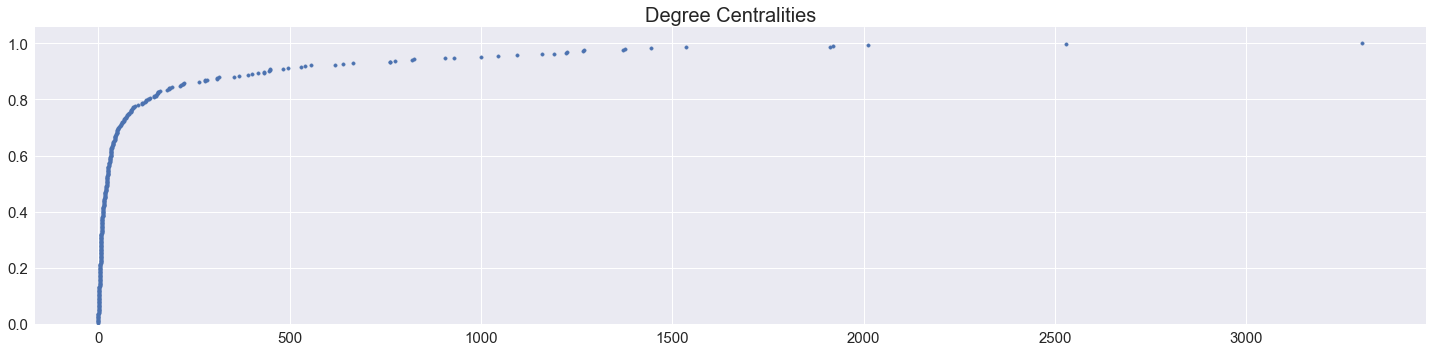

In [9]:
# degree centrality ecdf

fig, ax = plt.subplots(figsize=(20, 5))
deg_cent = list(nx.degree_centrality(G).values())
x, y = ecdf(deg_cent)

ax.scatter(x, y, marker='.')

# axis stuff

ax.set_title('Degree Centralities', fontdict={'fontsize': 20})
#ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('', fontdict={'fontsize': 30})
ax.set_ylabel('', fontdict={'fontsize': 30})
ax.set_ylim(0,)
fig.tight_layout()

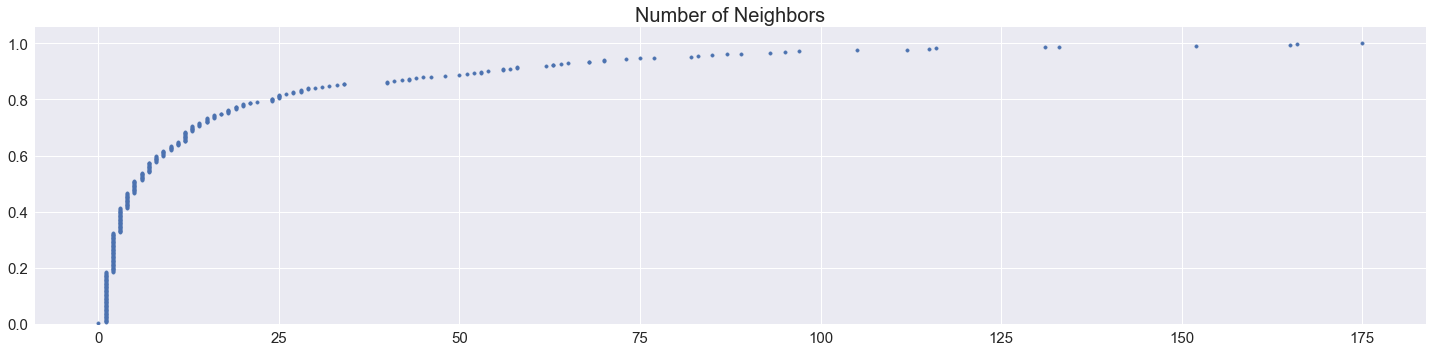

In [10]:
# neighbors ecdf

fig, ax = plt.subplots(figsize=(20, 5))
neighbors = [len(list(G.neighbors(node))) for node in G.nodes()]
x, y = ecdf(neighbors)

ax.scatter(x, y, marker='.')

# axis stuff

ax.set_title('Number of Neighbors', fontdict={'fontsize': 20})
#ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('', fontdict={'fontsize': 30})
ax.set_ylabel('', fontdict={'fontsize': 30})
ax.set_ylim(0,)
fig.tight_layout()

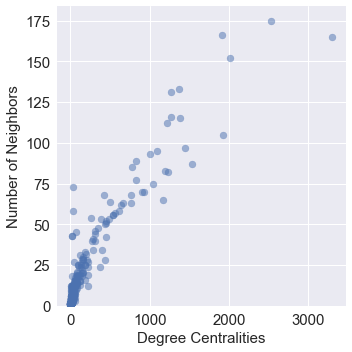

In [11]:
# sanity check - degree centrality should increase with number of neighbors - with full data

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(deg_cent, neighbors, alpha=0.5)

# axis stuff

ax.set_title('', fontdict={'fontsize': 20})
#ax.legend(loc='upper right', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('Degree Centralities', fontdict={'fontsize': 15})
ax.set_ylabel('Number of Neighbors', fontdict={'fontsize': 15})
ax.set_ylim(0,)
fig.tight_layout()

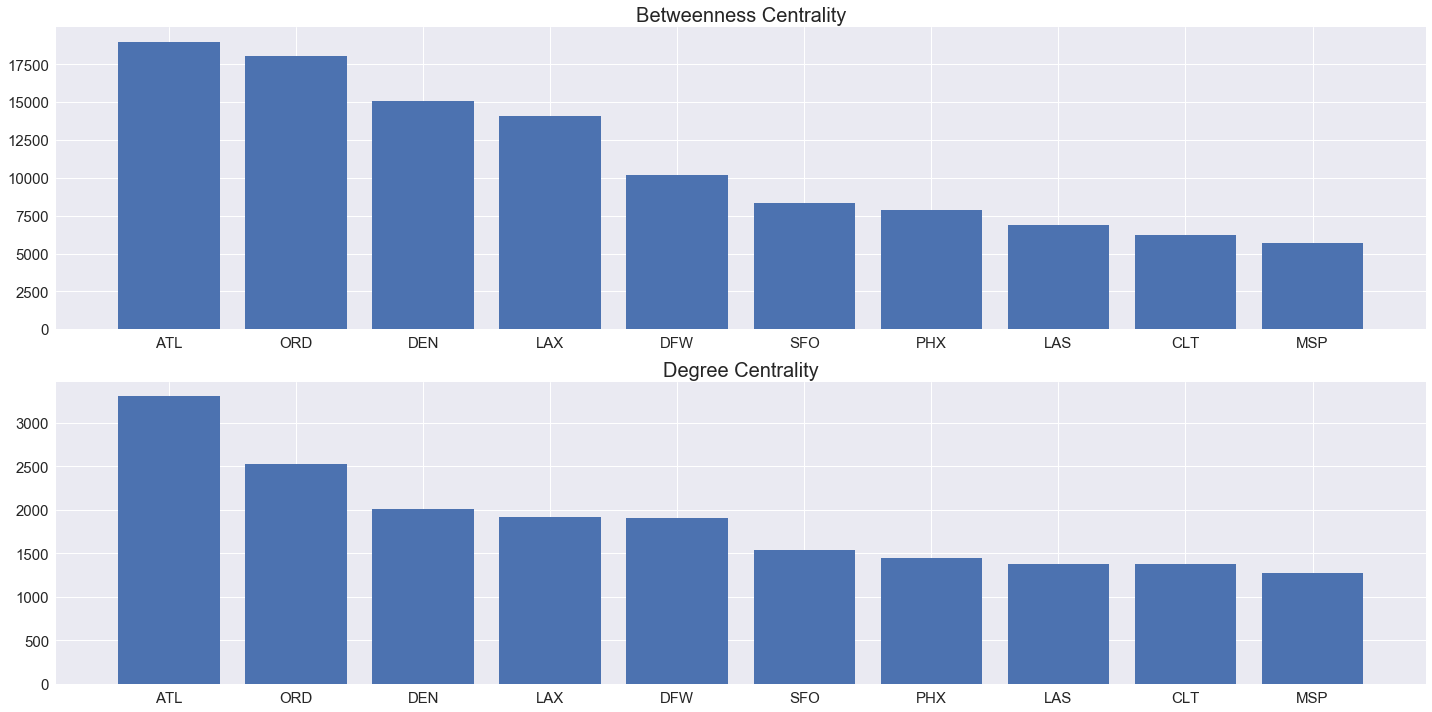

In [12]:
# betweenness centrality - how many shortest paths pass through a node
# KPI for how much information or control a given node has - high betweenness centrality implies hub airport

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

btws = nx.betweenness_centrality(G, normalized=False)
btws_sorted = sorted(btws.items(), key=lambda x:x[1], reverse=True)[0:10]

aiports = [x[0] for x in btws_sorted]
btws_cent = [x[1] for x in btws_sorted]

deg = nx.degree_centrality(G)
deg_sorted = sorted(deg.items(), key=lambda x:x[1], reverse=True)[0:10]

aiports = [x[0] for x in deg_sorted]
deg_cent = [x[1] for x in deg_sorted]

ax1.bar(aiports, btws_cent)
ax2.bar(aiports, deg_cent)

ax1.set_title('Betweenness Centrality', fontdict={'fontsize': 20})
#ax.legend(loc='upper right', fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=15)
ax1.set_xlabel('', fontdict={'fontsize': 15})
ax1.set_ylabel('', fontdict={'fontsize': 15})
ax1.set_ylim(0,)

ax2.set_title('Degree Centrality', fontdict={'fontsize': 20})
#ax.legend(loc='upper right', fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='minor', labelsize=15)
ax2.set_xlabel('', fontdict={'fontsize': 15})
ax2.set_ylabel('', fontdict={'fontsize': 15})
ax2.set_ylim(0,)

fig.tight_layout()